# 한글 워드 클라우드

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'gulim'

In [2]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [3]:
# 한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [4]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [5]:
# 품사 태깅(part-of speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


* 명사만 추출

In [6]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 워드클라우드
* 한빛출판 네트워크(https://www.hanbit.co.kr/store/books/new_book_list.html) > 새로나온 책 200권 > tag
* tag를 워드클라드우드로 만들기

## 1. 데이터 크롤링

In [43]:
import requests, re
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd

In [45]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url + '?page=' + str(1)
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

lis = soup.select('li.sub_book_list')
li = lis[0]
href = li.find('a')['href']

sub_req = requests.get(base_url + href)
sub_soup = BeautifulSoup(sub_req.text, 'html.parser')
tag_li = []
tags = sub_soup.select('.store_product_info_box .tag_area a')
for i in range(len(tags)):
    tag = tags[i].text.strip()
    tag_li.append(tag)
print(tag_li)

['시계', '달력', '시계보기', '달력보기', '수학워크북', '입학준비수학', '유아수학', '수학홈스쿨', '입학준비', '입학준비수학', '7살수학', '7살수학', '수학학습', '수학준비', '수학완성', '예비초등수학', '초등학습', '영역별수학']


In [48]:
tag_li = []
for page in tqdm(range(1,11)):
    url = base_url + sub_url + '?page=' + str(page)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    lis = soup.select('li.sub_book_list')
    
    for li in lis:
        href = li.find('a')['href']
        sub_req = requests.get(base_url + href)
        sub_soup = BeautifulSoup(sub_req.text, 'html.parser')
        tags = sub_soup.select('.store_product_info_box .tag_area a')
        for tag in tags:
            tag_li.append(tag.text.strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [49]:
len(tag_li)

2155

In [54]:
print(tag_li[:50])

['시계', '달력', '시계보기', '달력보기', '수학워크북', '입학준비수학', '유아수학', '수학홈스쿨', '입학준비', '입학준비수학', '7살수학', '7살수학', '수학학습', '수학준비', '수학완성', '예비초등수학', '초등학습', '영역별수학', 'Next.js', 'Next', 'nextjs', '넥스트', 'React', '리액트', 'TypeScript', '타입스크립트', 'JavaScript', '자바스크립트', '프레임워크', '라이브러리', '웹', '웹사이트', '웹개발', '프런트엔드', '백엔드', '서버 사이드 렌더링', 'SSR', 'Redux', 'Jest', 'Cypress', 'GraphCMS', 'Stripe', '유튜브', '영상 편집', '프리미어 프로', '비됴클래스', '영상 편집 유튜브', '유튜브 영상 편집', '모션그래픽', '영상 편집 배우기']


## 2. 워드클라우드 만들기
* tag_list를 frequency dictionary로 만들기

In [52]:
tag_set = set(tag_li)
len(tag_set)

1542

In [62]:
# 딕셔너리 만드는 방법1
tag_dict={item:tag_li.count(item) for item in tag_set}

# 딕셔너리 만드는 방법2
# tag_dict = {}
# for item in tag_set:
#     tag_dict[item] = tag_li.count(item)

# 딕셔너리 만드는 방법3
# count = 0
# for key, value in tag_dict.items():
#     print(key, ':', value)
#     count += 1
#     if count >5:
#         break

In [65]:
from wordcloud import WordCloud

In [72]:
font_path = 'C:\Windows\Fonts\gulim'
wc = WordCloud(font_path, random_state=2023, background_color='white')
wc = wc.generate_from_frequencies(tag_dict)

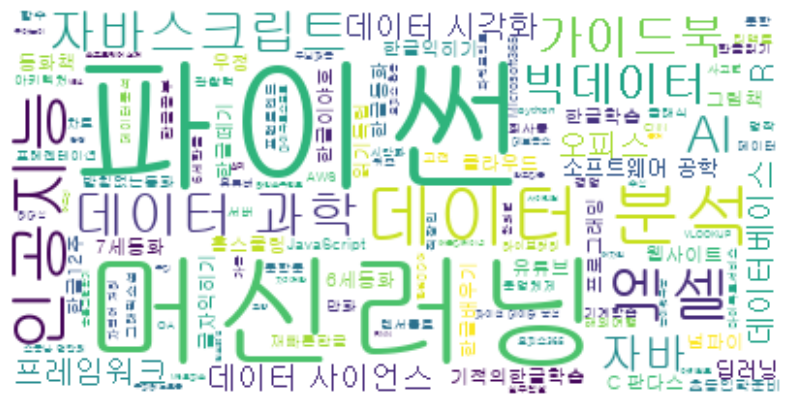

In [73]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 단어를 펼쳐서 워드클라우드 만들기

In [77]:
tag_text = ' '.join(tag_li)
wc = WordCloud(font_path, random_state=2023, background_color='white', max_words=500)
wc = wc.generate(tag_text)

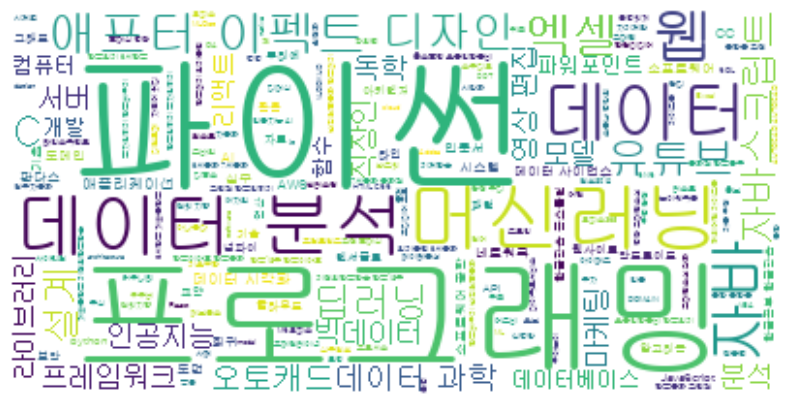

In [78]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()